In [99]:
import torch, os, pickle, time
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../scratch/gpfs/cj1223/GraphStorage/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,35]+list(range(37,60)))

In [5]:
os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

['medium_beforeafter',
 'medium_redshift_50_all',
 'test_multi_z0.0_None',
 'medium_smass_z1.0_standard',
 'test_onlyhmass_smass',
 'medium_redshift_80_all',
 'vlarge_all_final',
 'test_cut',
 'medium_all_q_diffbeforeafter',
 'vlarge_redshift_85_all',
 'medium_all_smass',
 'medium_onlyhmass_smass',
 'medium_scaleonly_smass',
 'vlarge_all_multi_z0.5_None',
 'vlarge_redshift_50_all',
 'test_z1.5_standard',
 'test_beforeafter',
 'vlarge_all_smass_standard',
 'vlarge_all_multi_z1.0_None',
 'test_all_smass',
 'vlarge_all_multi_z2.0_None',
 'vlarge_all_smass_power',
 'medium_redshift_15_all',
 'transformers',
 'medium_noinfonoedge_smass',
 'medium_onlyedge_smass',
 'medium_all_variance',
 'medium_redshift_1_all',
 'medium_all_q',
 'test_multi_z0.0_quantile',
 'medium_redshift_10_all',
 'medium_smass_z0.0_quantile',
 'medium_all_final',
 'vlarge_redshift_95_all',
 'test_variance',
 'test_z2.0_smass',
 'small_all_q_variancehalomass',
 'medium_all_residual',
 'medium_all',
 'test_auto_multi_z0.

In [130]:
cases=['vlarge_all_multit_z0.0_None','vlarge_all_multit_z0.5_None', 'vlarge_all_multit_z1.0_None', 'vlarge_all_multit_z2.0_None']
dataset=[]
xss=[]
yss=[]
lss=[]
edge_indexs=[]
edge_attrs=[]
splits=[]
ltot=[]
for case in tqdm(cases):
    data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))
    dataset.append(data)
    xs=[]
    ys=[]
    ls=[]
    edge_index=[]
    edge_attr=[]
    for d in data:
        xs.append(d.x.numpy())
        ys.append(d.y.numpy())
        edge_index.append(d.edge_index)
        edge_attr.append(d.edge_attr)
        l=len(d.x.numpy())
        ls.append(l)
    edge_indexs.append(edge_index)
    edge_attrs.append(edge_attr)
    xs=np.vstack(xs)
    ltot.append(len(xs))
    xs[:,40]=np.log10(xs[:,40])
    ys=np.vstack(ys)
    ls=np.array(ls)
    splits.append(np.cumsum(ls))
    xss.append(xs)
    yss.append(ys)
    lss.append(ls)
yls=[]
for y in yss:
    yls.append(len(y))

100%|████████████████████████████████████████████████████████████████████████| 4/4 [05:32<00:00, 83.19s/it]


## Scale the targets

In [131]:
### targets
ex=f'../samout/{0}_{0}_{0}/galprop_0-99.dat'
pdc=pd.read_table(path+ex, skiprows=0, delimiter=',', nrows=41, header=None)
targets=[8,11,14,15,16,17,18,23]
colst=pdc.iloc[targets,0]
cols_t = []
for i, col in enumerate(colst):
    cols_t.append(col[4:]+f'({i})') 
yss=np.vstack(yss)

100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:16<00:00,  2.12s/it]


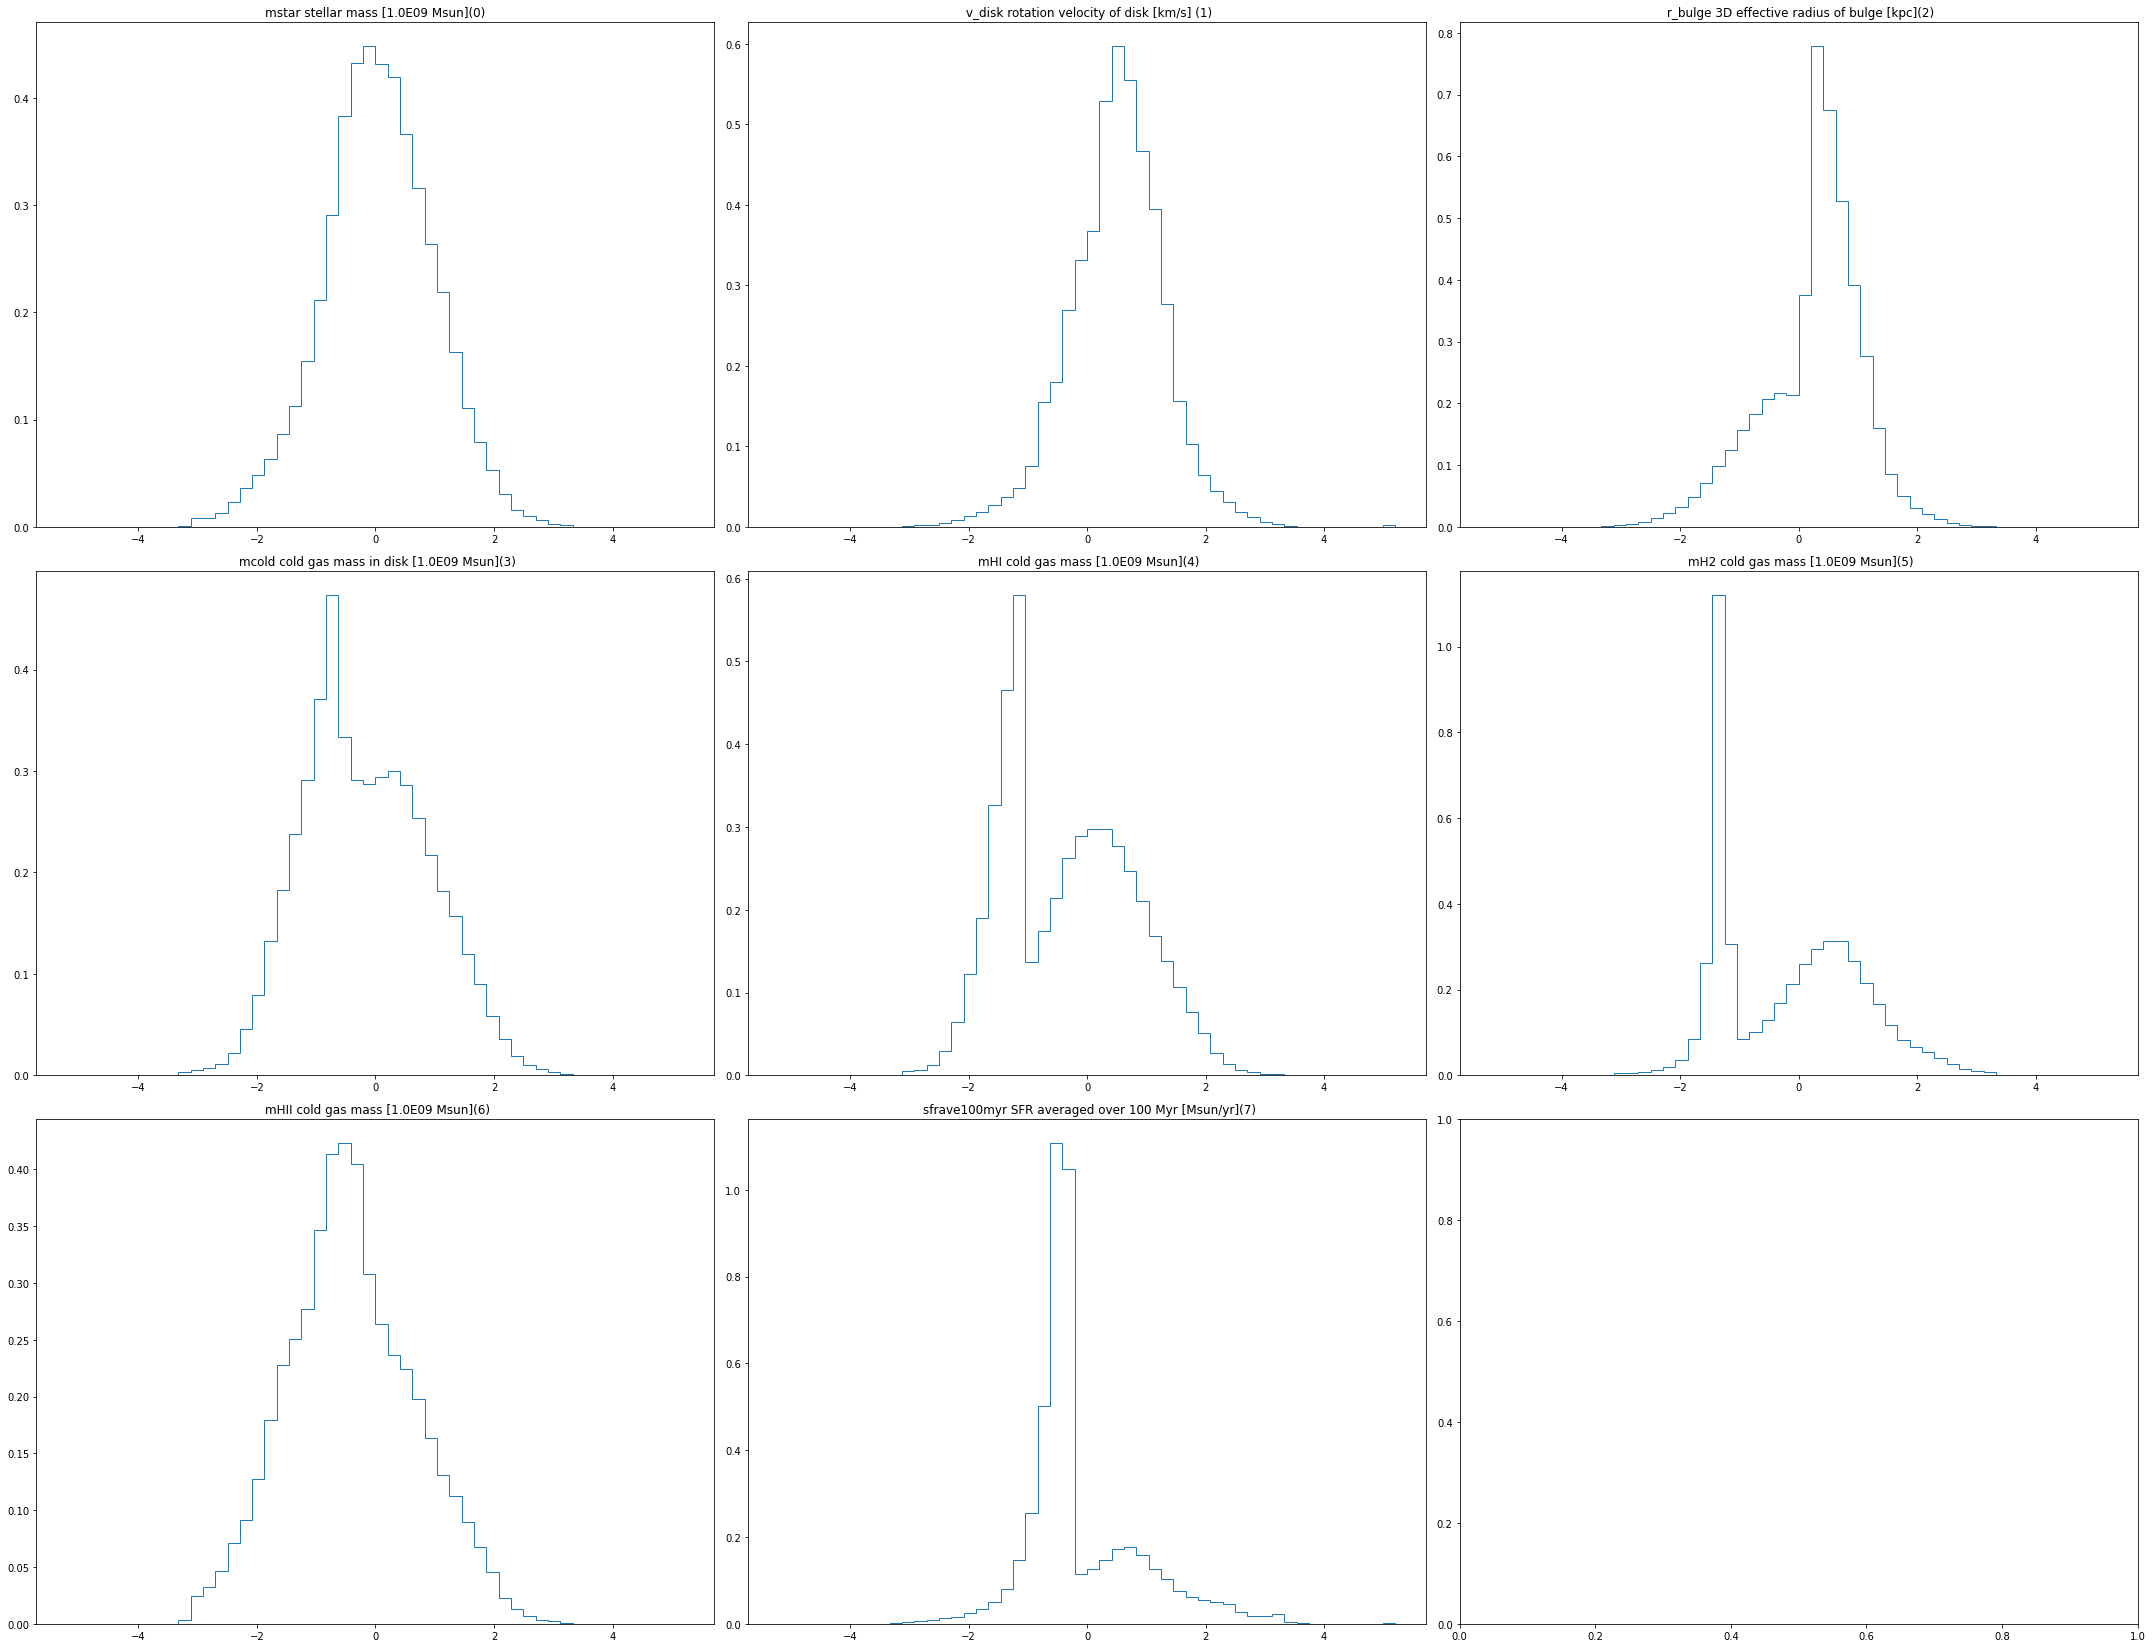

In [132]:
transform='quantile'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_alltarg_1.pkl")
scaler=pickle.load(open(transform_path, 'rb'))

fig,ax=plt.subplots(nrows=3,ncols=3, figsize=(30,23))
ax=ax.flatten()
ysQuant=np.copy(yss)
for i in tqdm(range(len(cols_t))):
    new=scaler[targets[i]].transform(yss[:,i].reshape(-1,1))
    ysQuant[:,i]=np.hstack(new)
#     ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

In [153]:
yssplit=np.split(ysQuant, np.cumsum(yls)[:-1])
yssplit[0].shape

(108808, 8)

100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:15<00:00,  1.92s/it]


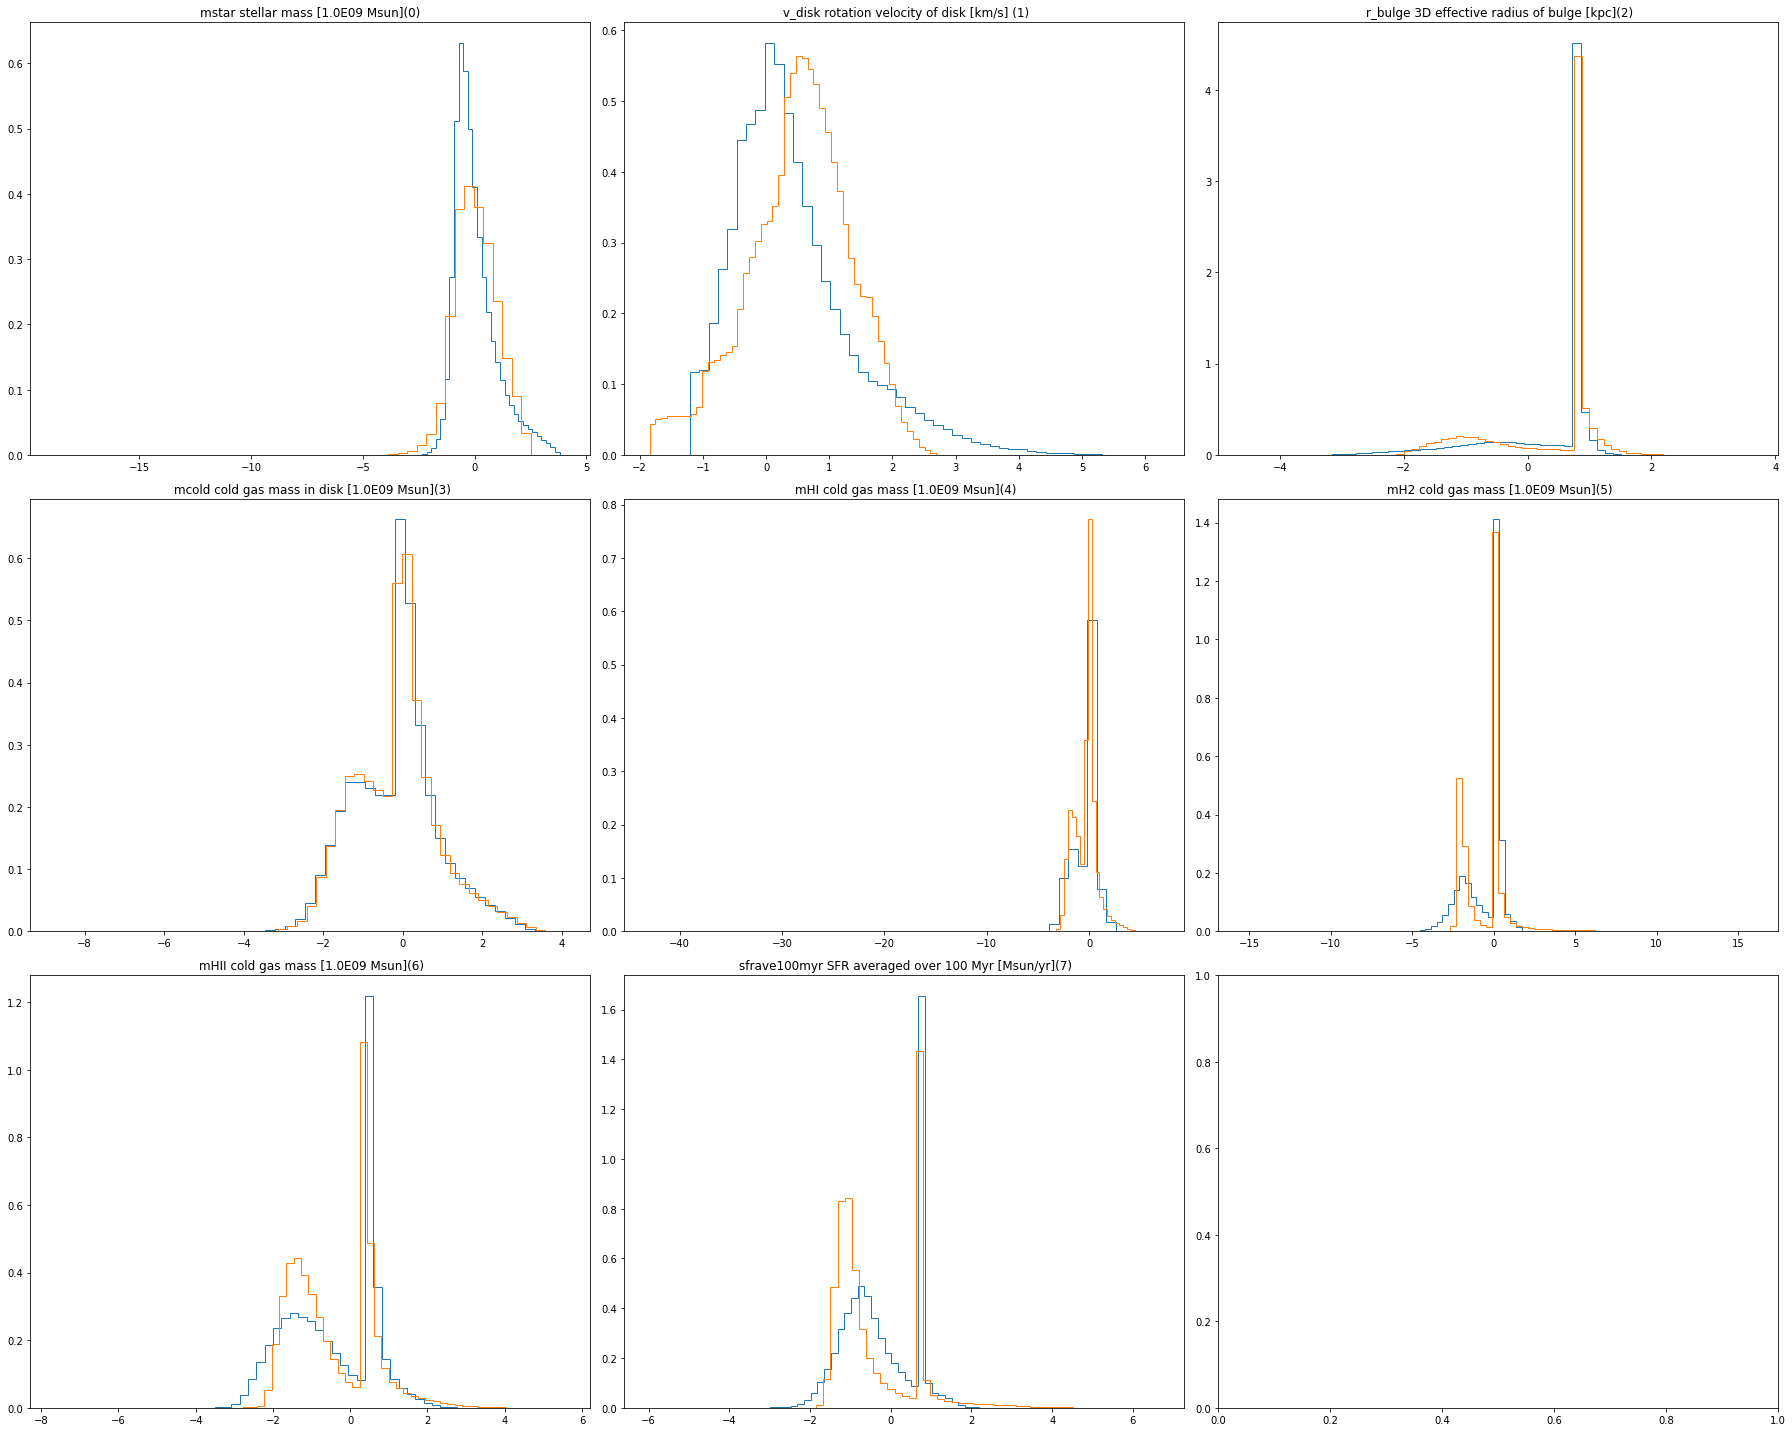

In [141]:
transform='standard'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_alltarg_1.pkl")
scaler0=pickle.load(open(transform_path, 'rb'))

transform='power'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_alltarg_1.pkl")
scaler1=pickle.load(open(transform_path, 'rb'))


fig,ax=plt.subplots(nrows=3,ncols=3, figsize=(25,20))
ax=ax.flatten()

ysStandard=np.copy(yss)
ysPower=np.copy(yss)

for i in tqdm(range(len(cols_t))):
    
#     ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    new=scaler0[targets[i]].transform(yss[:,i].reshape(-1,1))
    ysStandard[:,i]=np.hstack(new)
    ax[i].hist(new, bins=50, density=1, histtype='step');
    new=scaler1[targets[i]].transform(new)
    ysPower[:,i]=np.hstack(new)

    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

## Scale the inputs

In [142]:
xss=np.vstack(xss)

In [143]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')

In [144]:
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')        

100%|██████████████████████████████████████████████████████████████████████| 43/43 [00:30<00:00,  1.40it/s]


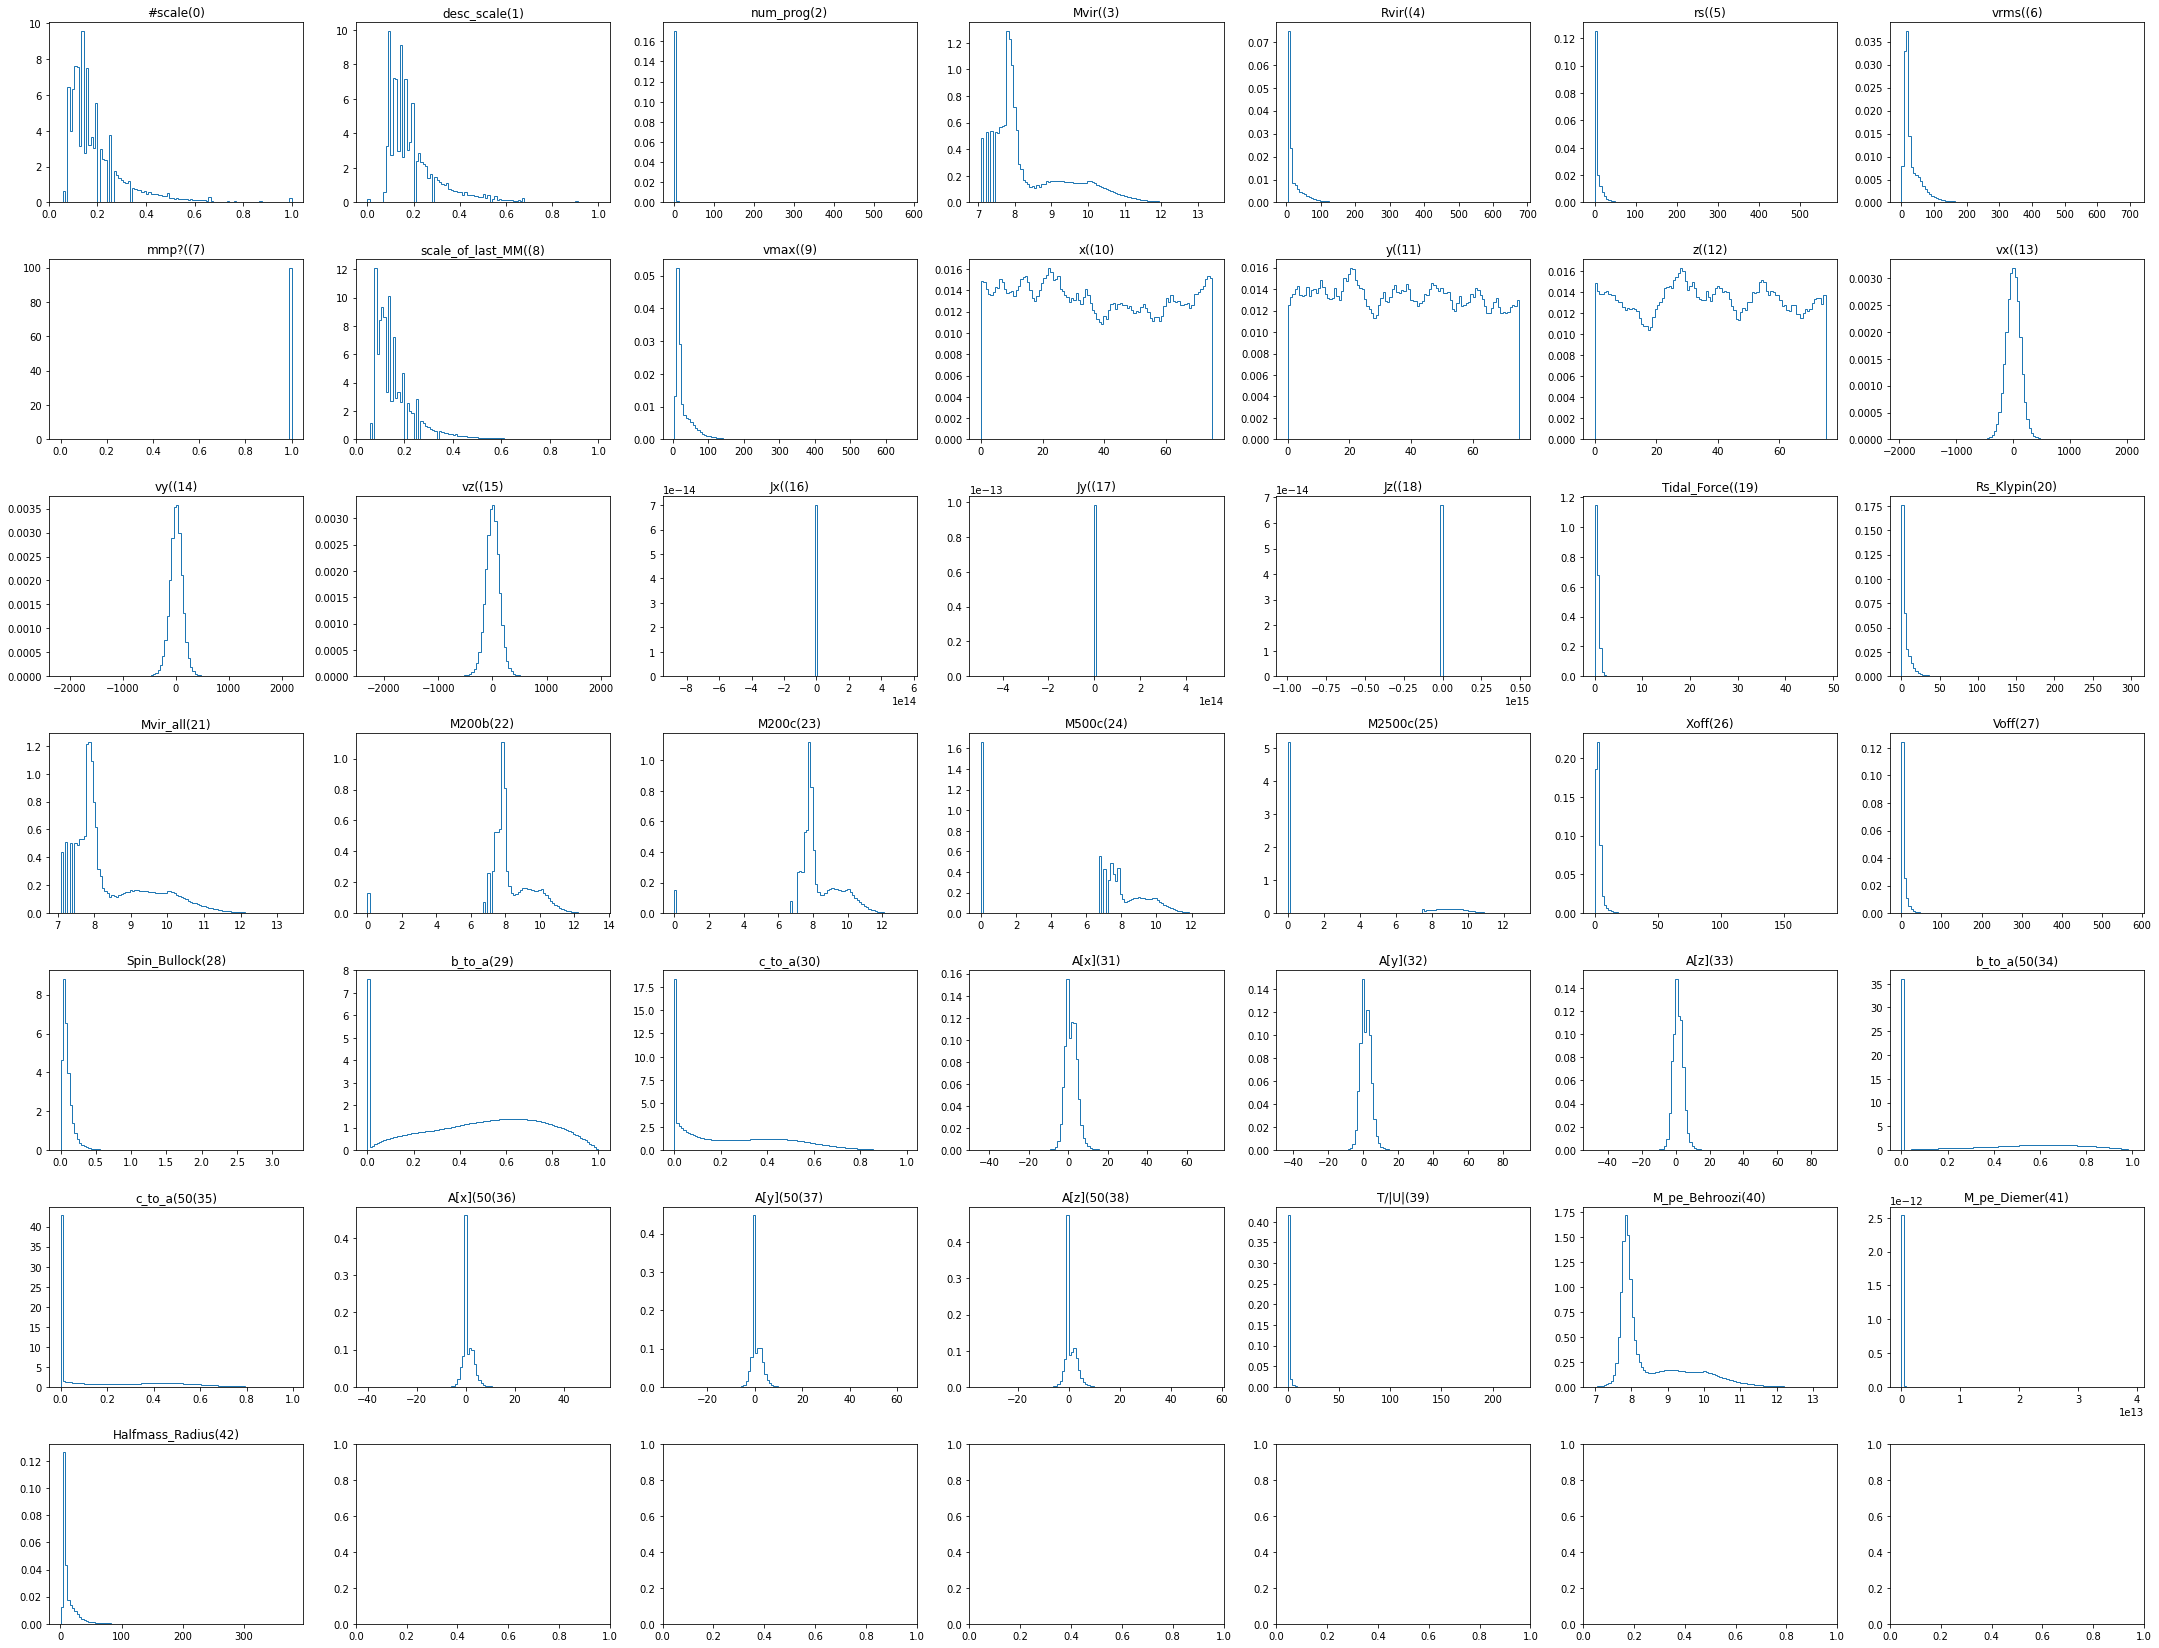

In [145]:
##raw plot

fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xss[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

  0%|                                                                               | 0/43 [00:13<?, ?it/s]


KeyboardInterrupt: 

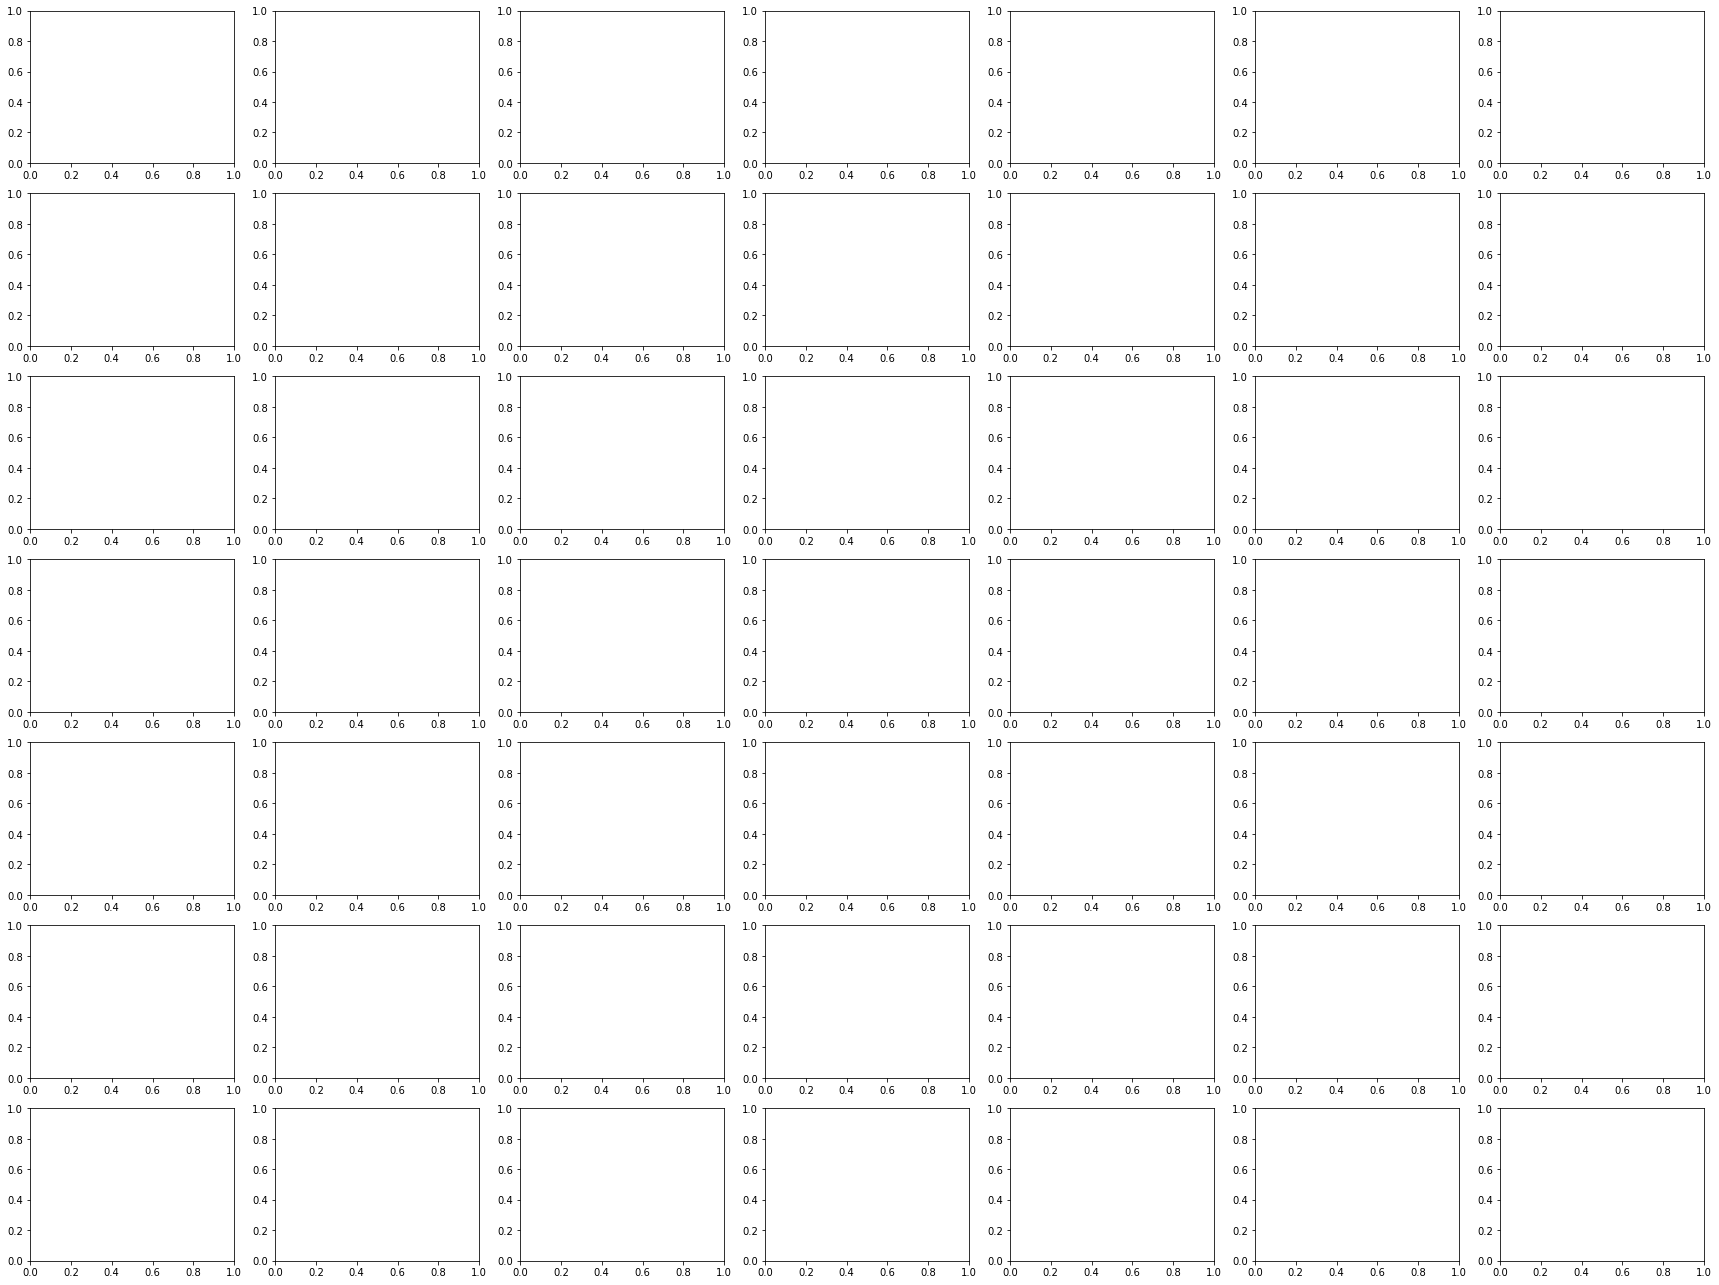

In [146]:
transform='quantile'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_allfeat_1.pkl")
scaler=pickle.load(open(transform_path, 'rb'))

fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()
xsQuant=np.copy(xss)
for i in tqdm(range(len(cols_h))):
    new=scaler[all_cols[i]].transform(xss[:,i].reshape(-1,1))
    xsQuant[:,i]=np.hstack(new)
#     ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [ ]:
xssplit=np.split(xsQuant, np.cumsum(ltot)[:-1])
graph_xs = []
for i, x in enumerate(xssplit):
    graph_xs.append(np.split(x, np.cumsum(lss[i])[:-1]))

for i, case in enumerate(cases):
    dat=[]
    
    for n in tqdm(range(len(graph_xs[i]))):
        x = torch.tensor(graph_xs[i][n], dtype=torch.float)
        y=torch.tensor(yss[i][n], dtype=torch.float)
        graph=Data(x=x, edge_index=edge_indexs[i][n], edge_attr=edge_attrs[i][n], y=y)
        dat.append(graph)
    case=case[:-4]+f'{transform}'
    print("Saving dataset")
    if not osp.exists(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')):
        os.mkdir(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}'))

    with open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'wb') as handle:
        print(handle)
        pickle.dump(dat, handle)

In [154]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z0.0_quantile/data.pkl'), 'rb'))

In [ ]:
datat[:5], data[:5]

100%|██████████████████████████████████████████████████████████████████████| 43/43 [01:02<00:00,  1.46s/it]


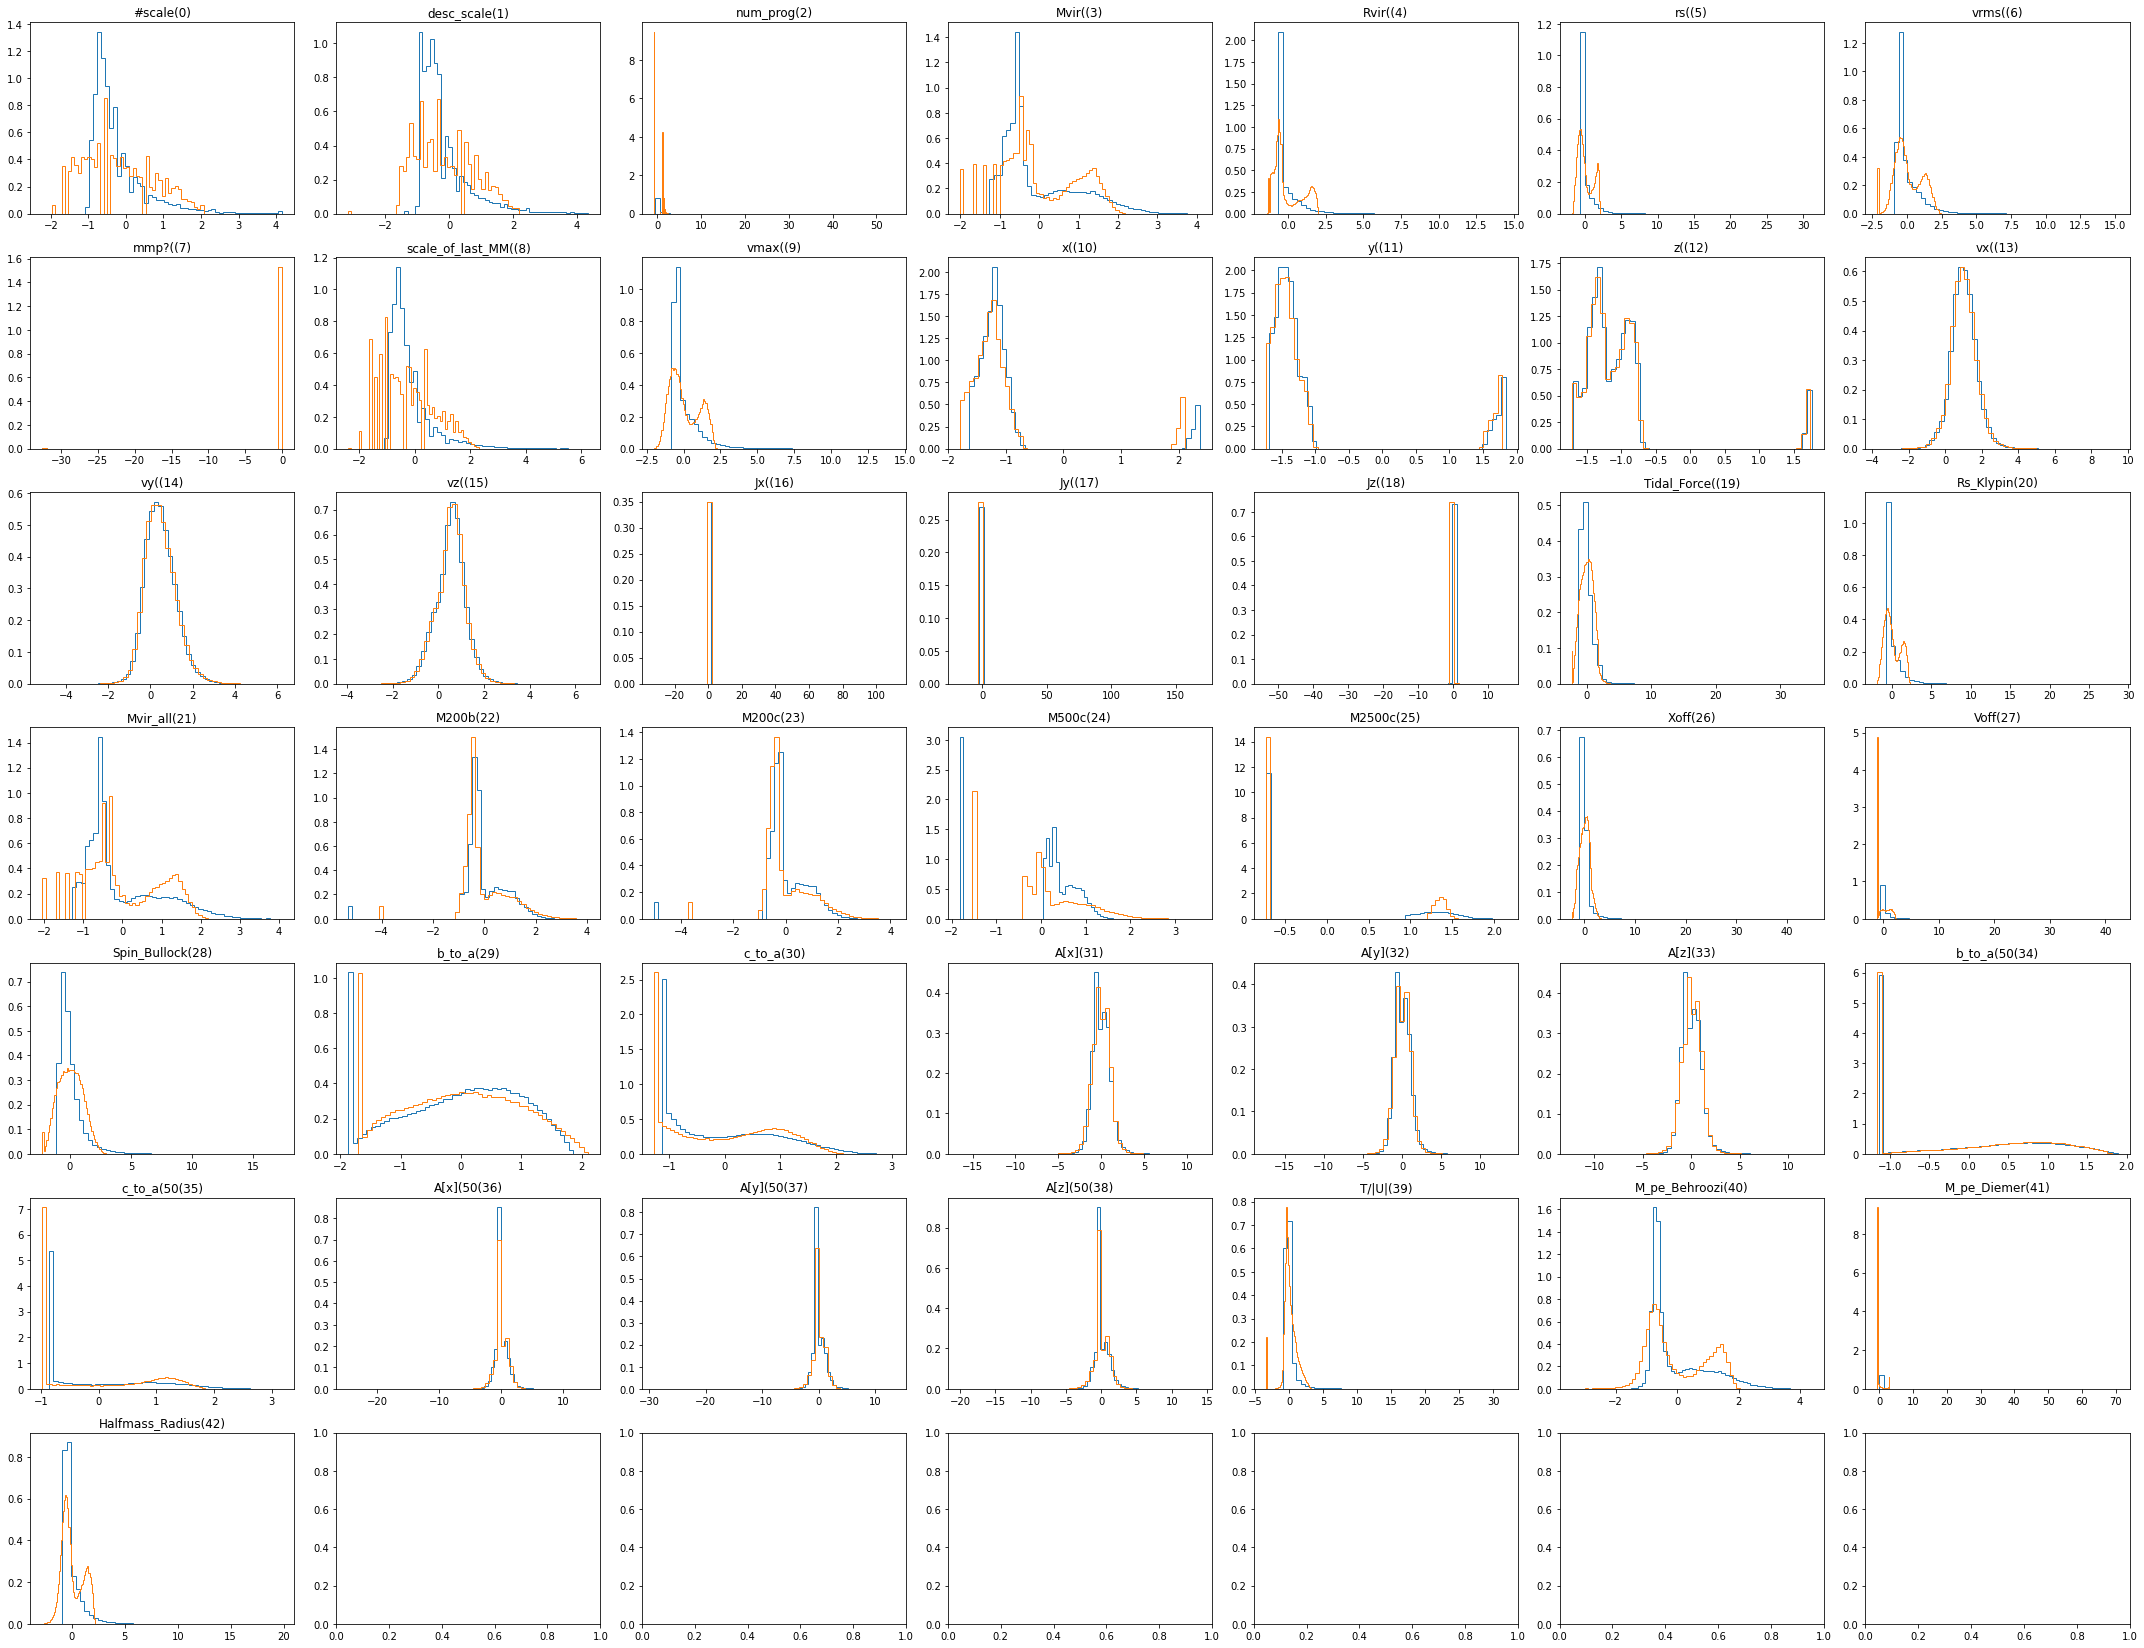

In [104]:
transform='standard'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_allfeat_1.pkl")
scaler0=pickle.load(open(transform_path, 'rb'))

transform='power'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_allfeat_1.pkl")
scaler1=pickle.load(open(transform_path, 'rb'))


fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()

xsStandard=np.copy(xss)
xsPower=np.copy(xss)

for i in tqdm(range(len(cols_h))):
    
#     ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    new=scaler0[all_cols[i]].transform(xss[:,i].reshape(-1,1))
    xsStandard[:,i]=np.hstack(new)
    ax[i].hist(new, bins=50, density=1, histtype='step');
    new=scaler1[all_cols[i]].transform(new)
    xsPower[:,i]=np.hstack(new)

    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [105]:
transform='standard'
xssplit=np.split(xsStandard, np.cumsum(ltot)[:-1])
graph_xs = []
for i, x in enumerate(xssplit):
    graph_xs.append(np.split(x, np.cumsum(lss[i])[:-1]))

for i, case in enumerate(cases):
    dat=[]
    
    for n in tqdm(range(len(graph_xs[i]))):
        x = torch.tensor(graph_xs[i][n], dtype=torch.float)
        y=torch.tensor(yss[i][n], dtype=torch.float)
        graph=Data(x=x, edge_index=edge_indexs[i][n], edge_attr=edge_attrs[i][n], y=y)
        dat.append(graph)
    case=case[:-4]+f'{transform}'
    print("Saving dataset")
    if not osp.exists(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')):
        os.mkdir(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}'))

    with open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'wb') as handle:
        print(handle)
        pickle.dump(dat, handle)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16007.76it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z0.0_standard/data.pkl'>


100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 17794.87it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z0.5_standard/data.pkl'>


100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16490.29it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z1.0_standard/data.pkl'>


100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 23483.16it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z2.0_standard/data.pkl'>


In [110]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z2.0_standard/data.pkl'), 'rb'))

In [111]:
transform='power'
xssplit=np.split(xsPower, np.cumsum(ltot)[:-1])
graph_xs = []
for i, x in enumerate(xssplit):
    graph_xs.append(np.split(x, np.cumsum(lss[i])[:-1]))

for i, case in enumerate(cases):
    dat=[]
    
    for n in tqdm(range(len(graph_xs[i]))):
        x = torch.tensor(graph_xs[i][n], dtype=torch.float)
        y=torch.tensor(yss[i][n], dtype=torch.float)
        graph=Data(x=x, edge_index=edge_indexs[i][n], edge_attr=edge_attrs[i][n], y=y)
        dat.append(graph)
    case=case[:-4]+f'{transform}'
    print("Saving dataset")
    if not osp.exists(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')):
        os.mkdir(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}'))

    with open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'wb') as handle:
        print(handle)
        pickle.dump(dat, handle)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16775.81it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z0.0_power/data.pkl'>


100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 19479.31it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z0.5_power/data.pkl'>


100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21686.08it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z1.0_power/data.pkl'>


100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 23064.64it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z2.0_power/data.pkl'>


In [112]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_multi_z2.0_power/data.pkl'), 'rb'))